In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# K-평균 최적화

- 군집의 중심점(centroid) 초기화 문제
- 최적의 군집수 결정 문제 

## 1. 중심점(centriod) 초기화

- 센트로이드 초기화에 따라 알고리즘 수렴의 최적화를 보장하지 못할 수 있다

### 중심점 초기화 방법

: 센트로이드 위치를 근사하게 알 수 있다면 최적의 솔루션을 반환할 수 있다

#### 방법1. 다른 군집 알고리즘을 먼저 실행하여 근사한 센트로이드 위치를 결정

- KMeans 클래스의 `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고, `n_init`를 1로 설정

#### 방법2. 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

- 랜덤 초기화 횟수 지정
    - KMeans 클래스의 매개변수 `n_init`로 조절
    - n_init 기본값은 10

#### 방법3. K-means++ 초기화 알고리즘 사용

- KMeans 클래스는 `init` 매개변수의 기본값으로 `K-means++`을 사용하고 있음
- 이 방식을 사용하고 싶지 않은 경우 `init` 매개변수를 `'random'`으로 지정

**[참고. K-Means++ ]**

- 데이비드 아서(David Arthur) & 세르게이 바실비츠키(Sergei Vassilvitskii) 2006년 제안
- 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계 제시
- 최적의 솔루션을 찾기 위한 실행 알고리즘의 반복 횟수를 크게 줄일 수 있으므로
- 초기화 단계에 드는 시간이 충분한 가치가 있는 알고리즘

**K-means++ 초기화 알고리즘**
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$를 선택한다.
2. $ \frac{D(x^{(i)})^2 } { \sum_{j=1}^m D(x^{(j)})^2 }$  의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드  $c^{(i)}$ 로 선택한다.

    - $ D(x^{(i)})^2 $  : 샘플 $x^{(i)}$와 이미 선택과 가장 가까운 센트로이드와의 거리
    - 이 확률분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높임
3. $k$개의 센트로이드가 선택될 때까지 이전 단계를 반복한다

### [실습] 중심점 초기화 지정

#### 5개 클러스터를 갖는 가상데이터

In [4]:
# 5개 중심점 좌표
blob_centers = np.array([[0.2,2.3],
                        [-1.5,2.3],
                        [-2.8,1.8],
                        [-2.8,2.8],
                        [-2.8,1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1,0.1])

x, y = make_blobs(n_samples=2000, centers = blob_centers, cluster_std = blob_std, random_state=7)

In [15]:
# centers : [('label1', center1)('label2',center2)...] 형식으로
def draw_cluster(X, y, centers=None, title=None):
    plt.figure(figsize=(8, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    markers = ['bs','r^']
    if centers:
        for i, center in enumerate(centers):
            label, pos = center
            plt.scatter(pos[:,0], pos[:, 1], 
                        marker=markers[i][1], c=markers[i][0], label=label)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title(title)
    if centers: plt.legend()
    plt.show()

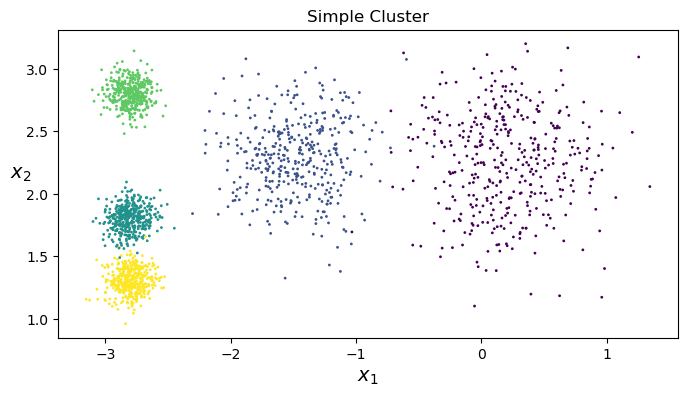

In [6]:
draw_cluster(x,y, title='Simple Cluster')

#### 초기화 방법1. 다른 군집알고리즘으로 근사한 중심점을 초기 센트로이드로 사용

클러스터 센터:
[[-2.79  2.8 ]
 [-2.8   1.8 ]
 [-2.8   1.3 ]
 [-1.47  2.29]
 [ 0.21  2.26]]


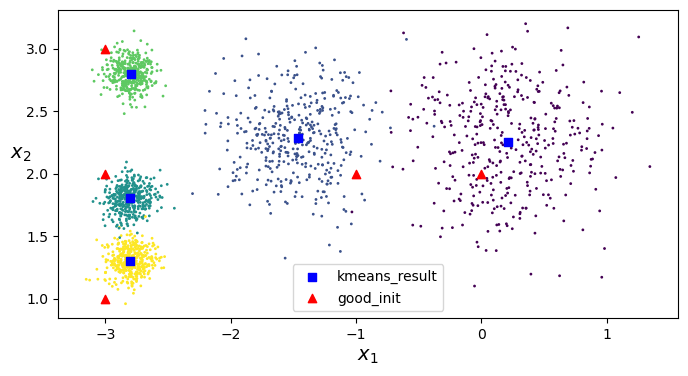

In [8]:
good_init = np.array([[-3,3], [-3,2],[-3,1],[-1,2],[0,2]])

kmeans_good_init = KMeans(n_clusters= 5, init=good_init, n_init=1)
kmeans_good_init.fit(x)
k_centers = kmeans_good_init.cluster_centers_
print(f'클러스터 센터:\n{np.round(k_centers, 2)}')
draw_cluster(x,y, centers= [('kmeans_result', k_centers),('good_init',good_init)])

#### 초기화 방법2. 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

KMeans() 파라미터 중 max_iter의 값을 변화
- init="random"
- n_init=1
- algorithm="full"
- max_iter = ?

**max_iter 변화시키면서 군집 수행**

max_iter= 3: cluster_centers:
[[-2.82  1.44]
 [-1.16  2.34]
 [-2.78  2.8 ]
 [ 0.3   2.23]
 [-2.41  1.97]]


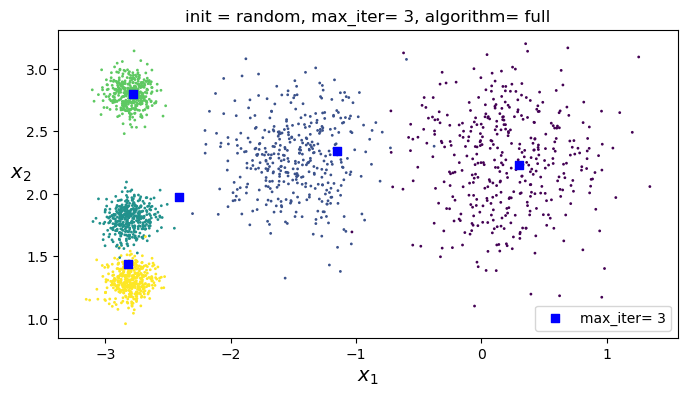


max_iter= 5: cluster_centers:
[[-2.82  1.44]
 [-1.43  2.3 ]
 [-2.79  2.8 ]
 [ 0.22  2.25]
 [-2.69  1.88]]


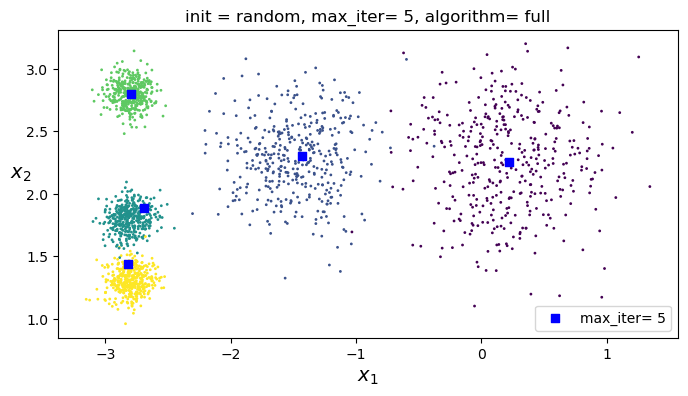


max_iter= 10: cluster_centers:
[[-2.8   1.3 ]
 [-1.47  2.29]
 [-2.79  2.8 ]
 [ 0.21  2.26]
 [-2.8   1.8 ]]


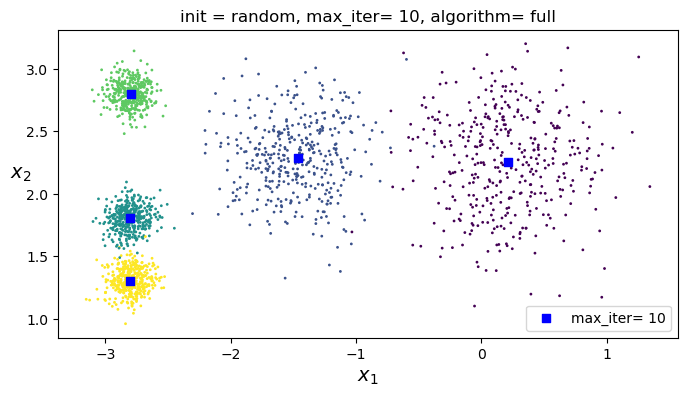

In [17]:
# max_iter의 변화 차이 확인
max_iters = [3,5,10]

for iter_n in max_iters:
    kmeans = KMeans(n_clusters= 5, init= 'random', n_init= 1, algorithm= 'full',
          max_iter= iter_n, random_state=0)
    kmeans.fit(x)
    centers = kmeans.cluster_centers_
    print(f'max_iter= {iter_n}: cluster_centers:\n{np.round(centers, 2)}')
    title = f'init = random, max_iter= {iter_n}, algorithm= full'
    draw_cluster(x,y, centers= [(f'max_iter= {iter_n}', centers)], title= title)
    print()

#### 초기화 방법3. K-means ++ 초기화 알고리즘 사용

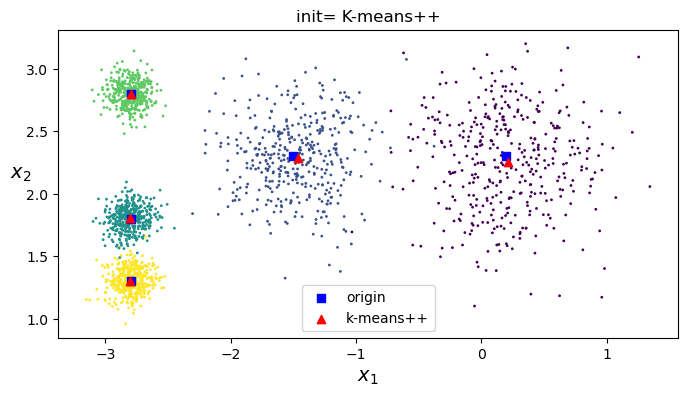

In [18]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
kmeans.fit(x)
k_centers = kmeans.cluster_centers_
draw_cluster(x,y, centers = [('origin', blob_centers),('k-means++',k_centers)],
            title='init= K-means++')

## 2. K-평균의 최적 솔루션 성능 지표

#### 이너셔가 가장 작은 모델이 최적

- 이너셔(inertia) : 각 샘플과 가까운 센트로이드 사이의 평균 제곱 거리


- KMeans 클래스의 `inertia_` 인스턴스 변수에 이너셔값을 저장

**inertia**
- inertia_: 각 클러스터 안에 있는 데이터 포인트들이 그 클러스터의 중심과 얼마나 가까운지를 나타내는 값
- 이 값이 작을수록 데이터 포인트들이 중심에 더 가까이 모여 있다

### 군집 결과의 이너셔(inertia) 비교

In [20]:
good_init = np.array([[-3,3], [-3,2],[-3,1],[-1,2],[0,2]])
k= 5
inertias = {}

for method in ['init_value', 'random','k-means++']:
    if method == 'random':
        for n in range(2,5):
            kmeans = KMeans(n_clusters= k, init= method, n_init=1, max_iter= n, random_state= 0)
            kmeans.fit(x)
            inertias[f'random: max_iter= {n}'] = kmeans.inertia_
    elif method == 'init_value':
            kmeans = KMeans(n_clusters= k, init= good_init, n_init=1)
            kmeans.fit(x)
            inertias[method] = kmeans.inertia_
    else:
        kmeans = KMeans(n_clusters= k, init= method, n_init=10, random_state= 0)
        kmeans.fit(x)
        inertias[method] = kmeans.inertia_

inertias

{'init_value': 211.59853725816836,
 'random: max_iter= 2': 373.0241779061537,
 'random: max_iter= 3': 279.34586670514017,
 'random: max_iter= 4': 247.5692858200287,
 'k-means++': 211.5985372581684}

=> 군집 알고리즘을 반복할수록 inertia값은 작이지며, 최적의 군집을 도출할 수 있음

### score() 메서드

- 이너셔의 음수값을 반환
- 사이킷런은 큰 값이 좋은 값이라는 규칙에 따라 이너셔의 음수값을 반환

In [27]:
# k-means++ / 이너셔의 음수값을 반환
kmeans.inertia_, kmeans.score(x)

(211.5985372581684, -211.59853725816834)

### 참고. K-평균 속도 개선과 미니배치 k-평균

**KMeans 알고리즘의 속도 개선**
- 2013년 찰스 엘칸(Charles Elkan) 제안
- 삼각부등식을 사용하여 불필요한 거리 계산을 줄임
- 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지
- 사이킷런의 KMeans 클래스에서 이 속도 개선 알고리즘 적용
    - `algorithm` 매개변수를 `'full'`로 지정

**미니배치를 사용한 K평균**
- 2010년 데이비드 스컬리(David Sculley) 제안
- 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용하여 센트로이드를 조금씩 이동
- 알고리즘 속도를 3배에서 4배 정도 높임
- 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있음
- 사이킷런의 `MiniBatchKMeans` 클래스

In [23]:
from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters= 5)
mini_kmeans.fit(x)

MiniBatchKMeans(n_clusters=5)

In [26]:
mini_kmeans.inertia_, mini_kmeans.score(x)

(211.6483993268992, -211.6483993268992)

- 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘 보다 훨씬 빠르지만, 이너셔는 일반적으로 조금 더 나쁨

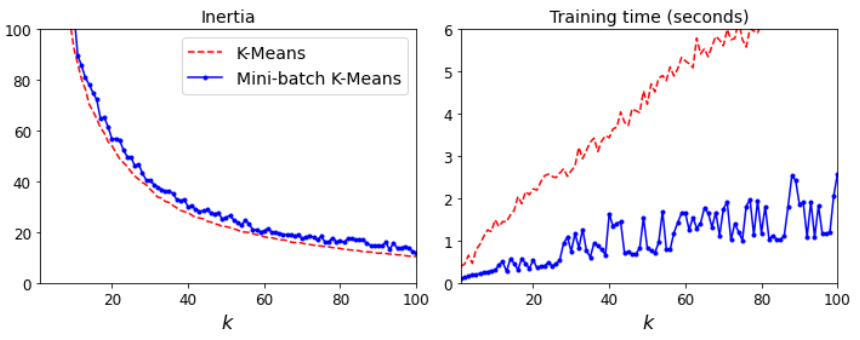

## 3. 최적의 클러스터 개수 찾기

### 방법1. 이너셔가 급격히 작아지는 지점(elbow)의 K 선택

In [38]:
# cluster k를 1에서 10까지 적용한 KMeans 모델을 생성하고 k에 따른 inertia를 저장하여 plotting하기
inertias= {}
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, random_state= 0)
    kmeans.fit(x)
    inertias[f'n_clusters= {k}']= kmeans.inertia_
inertias

{'n_clusters= 1': 3534.8360871670798,
 'n_clusters= 2': 1149.6140723750277,
 'n_clusters= 3': 653.2167190021552,
 'n_clusters= 4': 261.79677785694696,
 'n_clusters= 5': 211.59853725816836,
 'n_clusters= 6': 169.2297601376975,
 'n_clusters= 7': 141.3832649134119,
 'n_clusters= 8': 118.44854481108426,
 'n_clusters= 9': 102.63872920537068,
 'n_clusters= 10': 92.63291713978006}

**k=1~10인 KMeans 모델별 이너셔에 대한 그래프 작성**

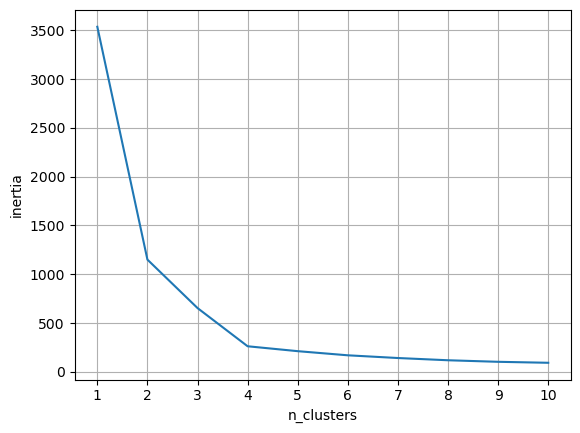

In [40]:
plt.plot(range(1, 11), inertias.values())
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.xticks(range(1,11))
plt.grid()
plt.show()

- 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 되어 이너셔는 더 작아짐

- 엘보(elbow) : 클러스터 개수 k가 커질 때 이너셔가 꺽이는 지점

### 방법2. 실루엣 점수(silhouette score)
: 모든 샘플에 대한 실루엣 계수의 평균

실루엣계수 $ = \frac {(b-a)}{max(a,b)}$
- a : 동일한 클러스터에 있는 다른 샘플까지 평균 거리
    - 클러스터 내부의 평균 거리
- b : 가장 가까운 클러스터까지 평균 거리
    - 가장 가까운 클러스터의 샘플까지 평균거리
    - 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터
    



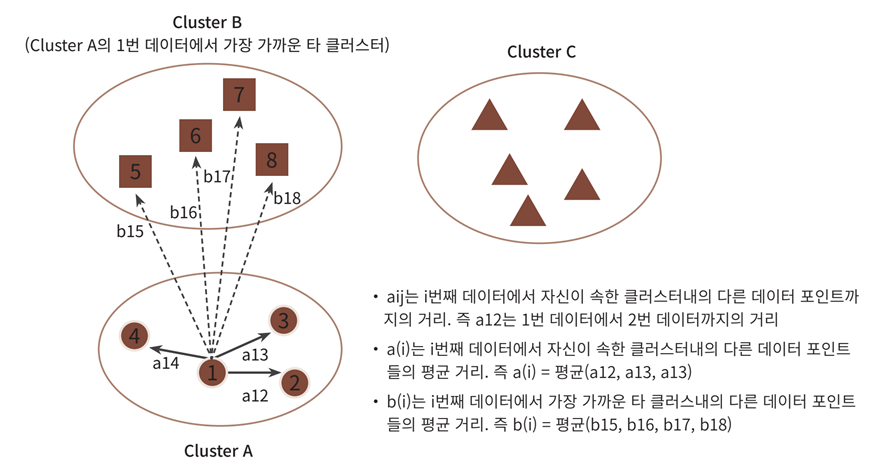


실루엣계수 : -1 ~ +1
- +1 에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있음을 나타냄
- 0에 가까우면 클러스터 경계에 위치함을 나타냄
- -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었음을 의미함

#### 실루엣계수 계산 : silhouette_score() 함수

silhouette_score(샘플, 할당된레이블)

In [41]:
from sklearn.metrics import silhouette_score

In [46]:
# 실루엣계수가 1에 가까울 수록 좋은 것.
k= 5
kmeans = KMeans(n_clusters= k, random_state= 42).fit(x)
silhouette_score(x, kmeans.labels_)

0.655517642572828

#### 클러스터 개수에 따른 실루엣 점수 비교

In [56]:
inertias= [KMeans(n_clusters= k, random_state= 42).fit(x) for k in range(2,11)]
sil_scores = [silhouette_score(x, inertia.labels_) for inertia in inertias]

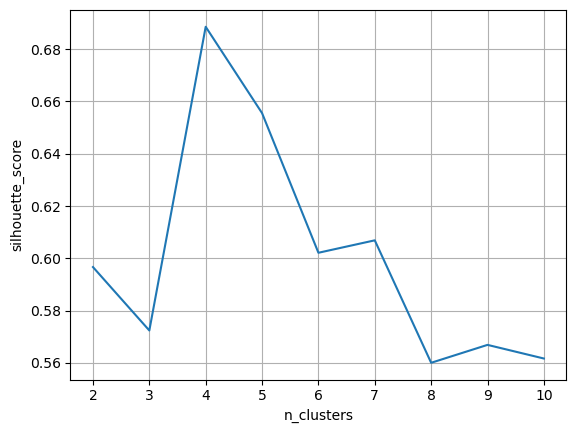

In [57]:
plt.plot(range(2, 11), sil_scores)
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.xticks(range(2,11))
plt.grid()
plt.show()

#### 실루엣 다이어그램
- 모든 샘플의 실루엣 계수를 할당된 클러스터와 계수값으로 정렬하여 그린 그래프
- 클러스터마다 칼 모양의 그래프가 그려짐
- 그래프의 높이는 클러스터가 포함하고 있는 샘플의 개수
- 그래프의 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냄
    - 너비가 넓을수록 좋음

In [59]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 
### 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 
    # 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서
    # 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 
        # 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

- 5개 클러스터 중심의 2000개 2차원 데이터 셋(앞의 샘플데이터)

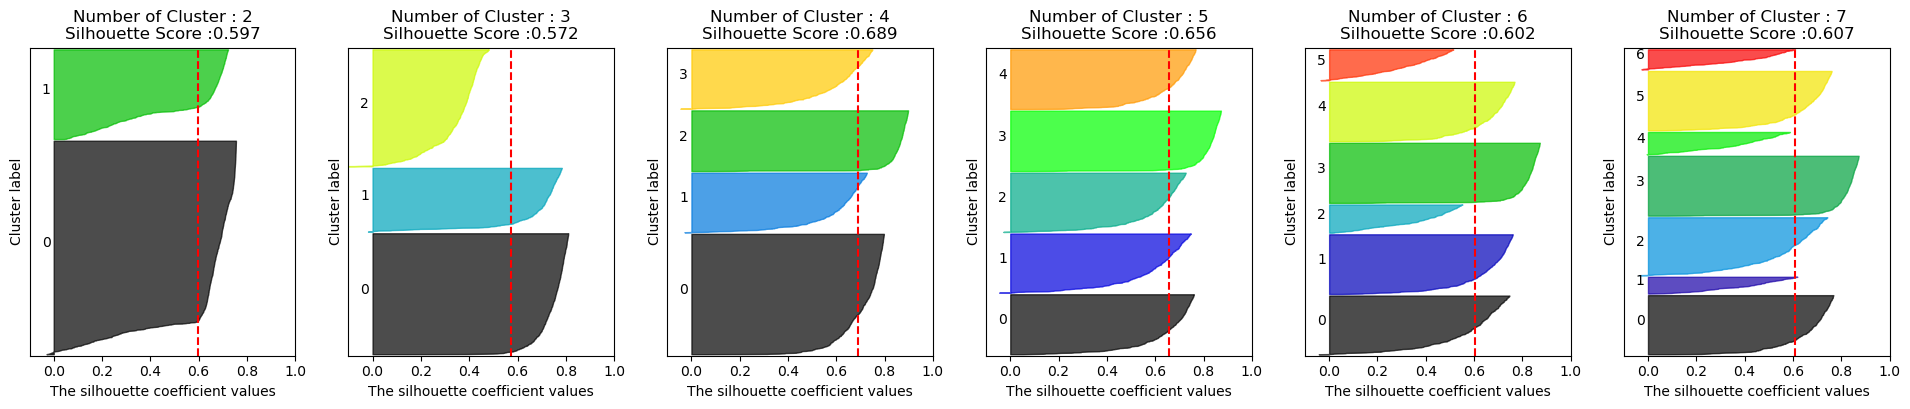

In [67]:
# 빨간 선을 모두 넘어가면 적절하다 2번째 그림은 0,1은 넘어가지만 2는 넘어가지않아 부적절하다.
visualize_silhouette(range(2,8), x)

- 4개의 클러스터 중심의 500개 2차원 데이터 셋에 KMeans 적용한 경우 실루엣 다이어그램  

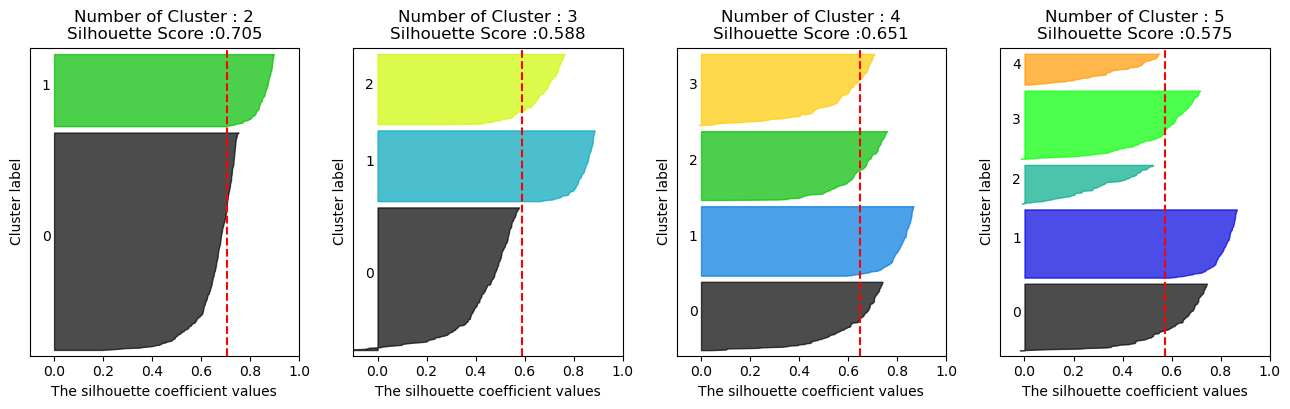

In [70]:
# 2와 4가 적절
from sklearn.datasets import make_blobs

x,y, = make_blobs(n_samples= 500, n_features=2, centers= 4, cluster_std= 1,
                  center_box= (-10.0, 10.0), shuffle=True, random_state=1)
visualize_silhouette(range(2,6),x)

- iris dataset에 대한 KMeans 적용한 경우 실루엣 다이어그램

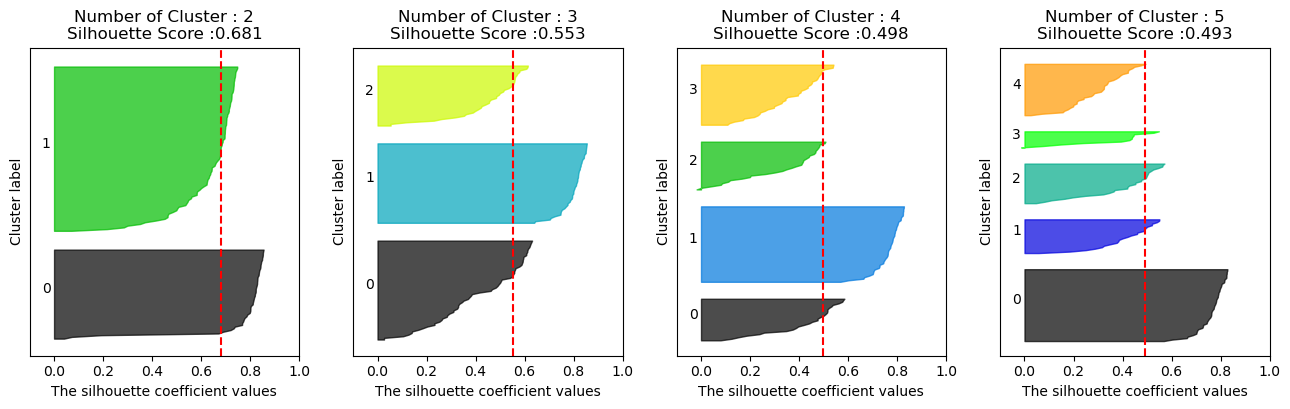

In [71]:
# 모두 넘지만 silhouette score가 2개가 가장 높다.
# 3은 전체 실루엣 계수의 평균값은 높은데, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화가 아님
from sklearn.datasets import load_iris
iris= load_iris()
visualize_silhouette(range(2,6), iris.data)

- 좋은 군집화가 되려면
1. 전체 실루엣 계수의 평균값(silhouette_score)이 1에 가까울수록 좋음
2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 함.
    - 만약 전체 실루엣 계수의 평균값은 높은데, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화가 아님

-------------------